In [1]:
## uncomment to install the required dependencies

# !pip install scipy
# !pip install seaborn
# !pip install numpy
# !pip install warnings
# !pip install skelarn
# !pip install matplotlib

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import random
warnings.filterwarnings("ignore")
%matplotlib inline
random.seed(1234)

In [3]:
# read the csv file from data folder and store it as a dataframe

path = './data/task_data.csv'
df = pd.read_csv(path)

Before diving right into building machine learning models, it is necessary to understand the properties of the dataset along with its structure. Exploratory Data Analysis(EDA) is performed to understand and visualize the data.

# Exploratory Data Analysis


In [4]:
# peeking into the first 10 rows of the data
df.head(10)

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,sample0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,sample1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,sample2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,sample3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,sample4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969
5,sample5,1.0,0.240630,0.142478,0.091416,0.117598,0.812113,0.943702,0.104643,0.849267,0.871184,0.012566
6,sample6,1.0,0.405645,0.727388,0.663814,0.693275,0.944709,0.973890,0.754428,0.297616,0.908339,0.234749
7,sample7,1.0,0.714747,0.656210,0.588290,0.134370,0.861762,0.943616,0.226714,0.546324,0.688983,0.883038
8,sample8,1.0,0.535342,0.273591,0.621033,0.780336,0.966042,0.463965,0.940389,0.867455,0.990741,0.028283
9,sample9,1.0,0.548197,0.337426,0.265824,0.249461,0.703808,0.958615,0.767494,0.205818,0.760199,0.932066


In [5]:
# by simply eyeballing the data, we can conclude that 'sample index' column is not needed so drop it
df = df.drop(['sample index'], axis=1)

In [6]:
# viewing columns names
df.columns

Index(['class_label', 'sensor0', 'sensor1', 'sensor2', 'sensor3', 'sensor4',
       'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9'],
      dtype='object')

In [7]:
# there are 400 samples with 10 feature columns + 1 target variable column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
class_label    400 non-null float64
sensor0        400 non-null float64
sensor1        400 non-null float64
sensor2        400 non-null float64
sensor3        400 non-null float64
sensor4        400 non-null float64
sensor5        400 non-null float64
sensor6        400 non-null float64
sensor7        400 non-null float64
sensor8        400 non-null float64
sensor9        400 non-null float64
dtypes: float64(11)
memory usage: 34.5 KB


In [8]:
# check for null values: there are no null values
df.isnull().any()

class_label    False
sensor0        False
sensor1        False
sensor2        False
sensor3        False
sensor4        False
sensor5        False
sensor6        False
sensor7        False
sensor8        False
sensor9        False
dtype: bool

Text(0.5, 1.0, 'Count Plot of target variable')

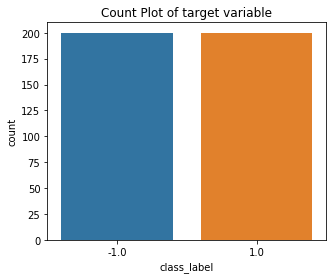

In [9]:
# check for the class balance/imbalance
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x=df['class_label']).set_title('Count Plot of target variable')


The data set is balanced because both the classes have equal number of instances present.

In [10]:
# number of samples in each feature belonging to +1 and -1 classes: dataset is well balanced and ideal
df.groupby('class_label').count()

,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
class_label,,,,,,,,,,
-1.0,200,200,200,200,200,200,200,200,200,200
1.0,200,200,200,200,200,200,200,200,200,200


#### Correlation of sensors with the target variable
Correlation describes the statistical relation between two variables. The value of pearson's correlation coefficient ranges between +1 and -1. Below pearson's coefficient has been visualized for each feature variable with the target variable.

sensor8    0.660618
sensor4    0.607623
sensor0    0.543295
sensor3    0.433636
sensor5    0.224147
sensor7    0.175612
sensor9    0.094907
sensor2    0.038775
sensor6   -0.007414
sensor1   -0.252007
Name: class_label, dtype: float64


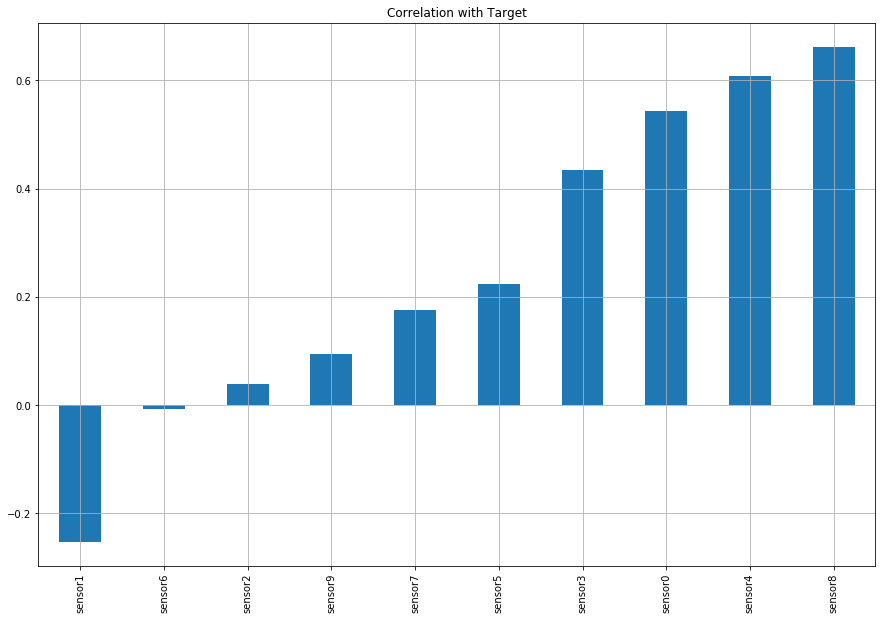

In [11]:
pearson_df = df.corr().sort_values('class_label', ascending=False)['class_label']
print(pearson_df.drop(['class_label'], axis=0))
plt.figure(figsize=(5, 5))
df.drop(['class_label'],axis=1).corrwith(df['class_label']).sort_values().plot.bar(figsize = (15, 10), title = "Correlation with Target", fontsize = 10,grid = True)

Sensor8 has the highest positive correlation with the target value followed by Sensor 4. Sensor 6 has almost negligible correlation with the target value. Sensor 1 has highest negative correlation with the target variable.

In [12]:
# descriptive statistics of the features
df.drop(['class_label'],axis=1).describe()

,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.523661,0.509223,0.481238,0.509752,0.497875,0.501065,0.490480,0.482372,0.482822,0.541933
std,0.268194,0.276878,0.287584,0.297712,0.288208,0.287634,0.289954,0.282714,0.296180,0.272490
min,0.007775,0.003865,0.004473,0.001466,0.000250,0.000425,0.000173,0.003322,0.003165,0.000452
25%,0.299792,0.283004,0.235544,0.262697,0.249369,0.269430,0.226687,0.242848,0.213626,0.321264
50%,0.534906,0.507583,0.460241,0.510066,0.497842,0.497108,0.477341,0.463438,0.462251,0.578389
75%,0.751887,0.727843,0.734937,0.768975,0.743401,0.738854,0.735304,0.732483,0.740542,0.768990
max,0.999476,0.998680,0.992963,0.995119,0.999412,0.997367,0.997141,0.998230,0.996098,0.999465


## Properties of the data

1. The dataset is balanced. i.e both the classes 1 and -1 have equal number of class instances present.
2. The dataset does not have any null values.
3. There are 400 sample instances with 11 columns occupying 34.5 KB of space. The dataset is small.
4. All the sensor values are between 0 and 1. Hence the data normalization is not needed.
5. Mean of all the sensors is ~0.5 and standard deviation is ~0.28. 
6. On an average 25% of the data is below 25th quartile, 50% of the data is below 50th quartile and 75% of the data is below 75th quartile. The data is well distributed.
7. The dataset does not have any complexities such as class-imbalances, magnitude differences among the features.

### Kurtosis

Data that follow a normal distribution perfectly have a kurtosis value of 0 which forms a perfect baseline because it represents the kurtosis of normal distribution.

All the sensor data distribution have negative kurotsis which implies that all of them have lighter tails and flatter peak than the normal distribution. This also is a characterstic of beta distribution with first and second shape parameers equal to 2.


In [13]:
df[df.columns].drop(['class_label'],axis=1).kurtosis()

sensor0   -1.074336
sensor1   -1.052074
sensor2   -1.179194
sensor3   -1.251545
sensor4   -1.163681
sensor5   -1.186732
sensor6   -1.153492
sensor7   -1.186152
sensor8   -1.223665
sensor9   -0.986721
dtype: float64

### Skewness
Skewness for a normal distribution is always 0. Below it is shown that sensors-0,1,3,4 and 9 are negatively skewed with a long tail in negative direction. But since the skewed coefficients are nearly close to 0 we can ignore this.

Rest of the sensors are positively skewed and again the coefficients are close to 0 and can be ignored.


In [14]:
df[df.columns].drop(['class_label'],axis=1).skew()

sensor0   -0.093803
sensor1   -0.059057
sensor2    0.053113
sensor3   -0.068885
sensor4   -0.026672
sensor5    0.012120
sensor6    0.053018
sensor7    0.081873
sensor8    0.072892
sensor9   -0.264570
dtype: float64

#### Visualizing data distribution using pairplot
Below the plots in diagonal are the density distribution of the variables and the scatter plots are the joint distributions. Clearly the features does not have any linear dependancy with the target variable. All the features have a plateau like peak which indicate that these distributions are not normal distributions.


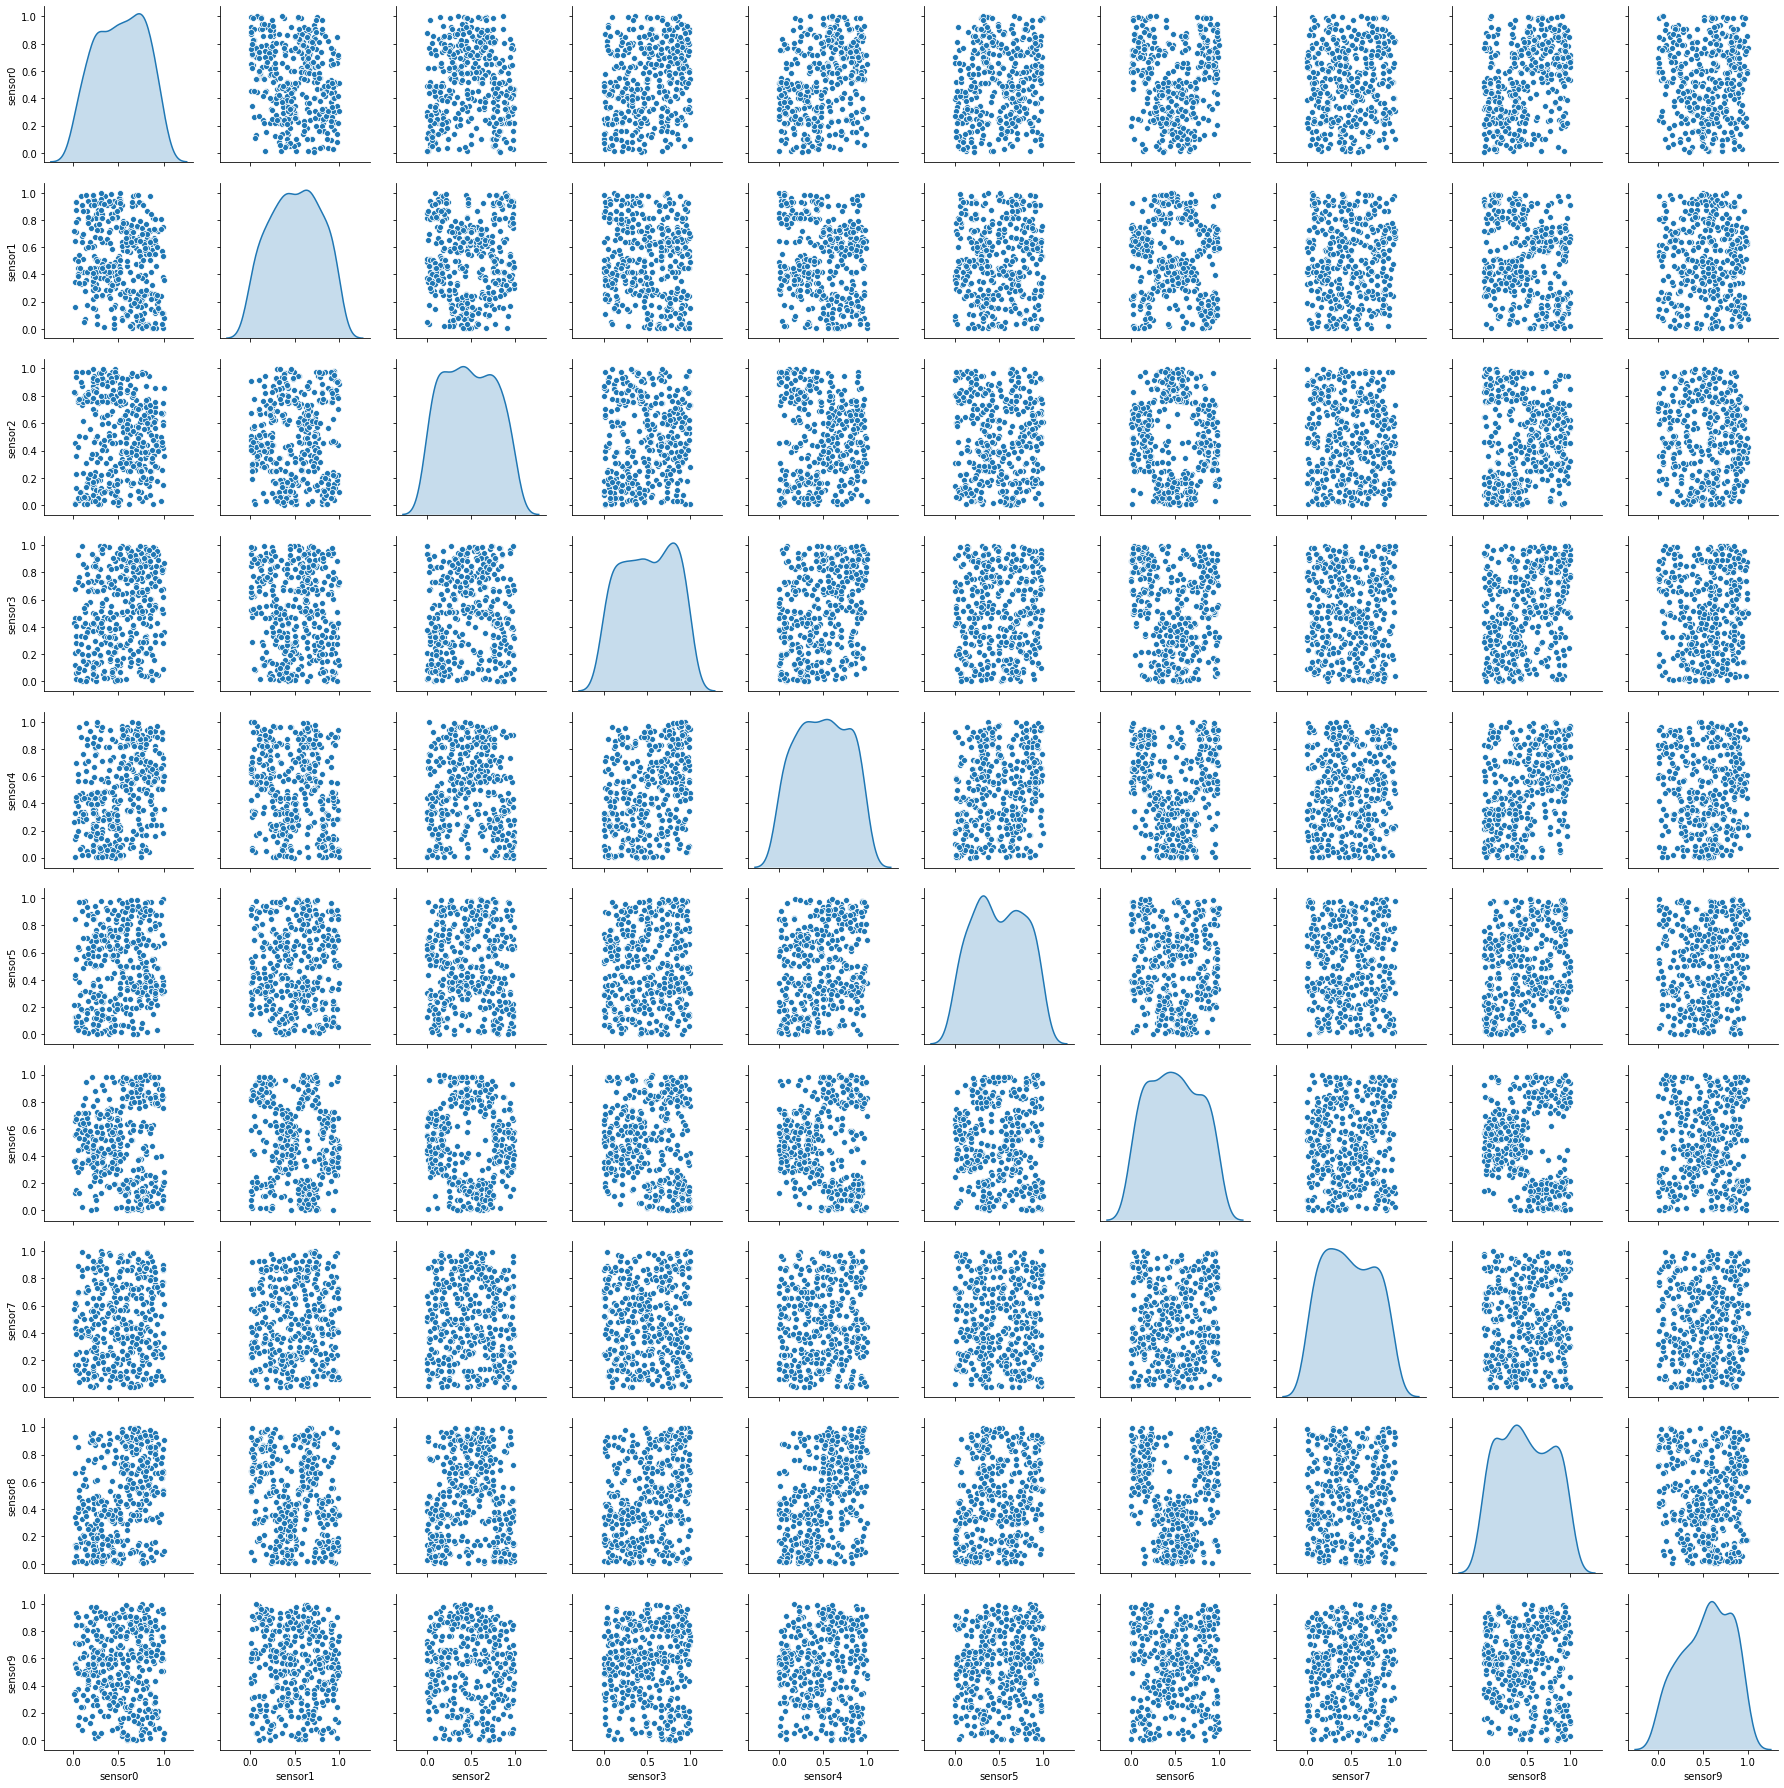

In [15]:
sns.pairplot(df.drop(['class_label'],axis=1), diag_kind="kde")

#### Outlier analysis with box plots
Clearly the data does not have any outliers because no data points are located beyond the whiskers and most of the data is well withing the quartile range. Sensor 9 has the highest mean value ~0.6.

Text(0.5, 1.0, 'Box Plot')

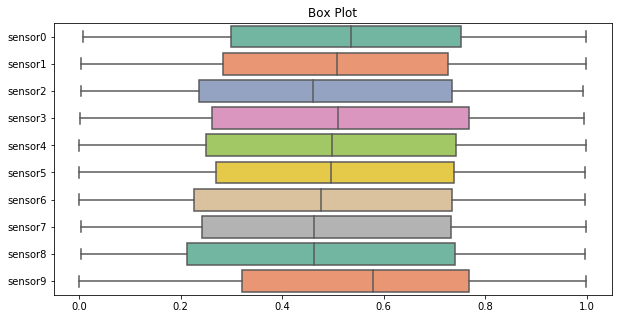

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.drop(['class_label'],axis=1), orient="h", palette="Set2").set_title('Box Plot')

#### Normality test to check the distribution of sensors and potential outliers
I have used shapiro wilk test here since this test is suitable especially for small datasets(around thousand sample instances). It is also useful for detecting the potential outliers and we can visualize them in qqplots. None of the sensor data distribution is normal as per below results. Also in the pairplots shown above, the marginal distribution has plateau like peaks and light tails.

In [17]:
from scipy.stats import shapiro

alpha = 0.05
for feature in df.drop(['class_label'],axis=1).columns:
    stat, p = shapiro(df['sensor6'])
    if p > alpha:
        print('Sample is derived from Gaussian: fail to reject H0 for',feature)
    else:
        print('Sample does not derive from Gaussian: reject H0 for', feature)

Sample does not derive from Gaussian: reject H0 for sensor0
Sample does not derive from Gaussian: reject H0 for sensor1
Sample does not derive from Gaussian: reject H0 for sensor2
Sample does not derive from Gaussian: reject H0 for sensor3
Sample does not derive from Gaussian: reject H0 for sensor4
Sample does not derive from Gaussian: reject H0 for sensor5
Sample does not derive from Gaussian: reject H0 for sensor6
Sample does not derive from Gaussian: reject H0 for sensor7
Sample does not derive from Gaussian: reject H0 for sensor8
Sample does not derive from Gaussian: reject H0 for sensor9


## Feature importance/selection methods

These methods are important in machine learning to reduce overfitting, to improve the accuracy with right feature subsets and to reduce the number of features in order to train the model faster. There are three methods to do so:

(Refer "A survey on feature selection methods"-by Girish Chandrashekar and Ferat Sahin)

1. Filter Methods
2. Wrapper Methods
3. Embedding Methods

### Filter Method
chi2 test (Univariate feature selection method)
This method is applied to test the independence of two events. In this case it is applied to test the independece of feature variable with target variable. Results are ranked in descending order according to their importance scores. The most important feature appears at the top.

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif # f_classif also gives the same resultbased on ANOVA test

In [19]:
# creating the dependent variable y and independent variable X
X = df.drop('class_label', axis = 1)
y = df.class_label

In [20]:
best_features = SelectKBest(score_func=chi2, k="all")
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Sensors','Score']
feature_scores.nlargest(10,'Score')


,Sensors,Score
8,sensor8,31.637080
4,sensor4,24.577241
0,sensor0,16.176762
3,sensor3,13.045426
1,sensor1,3.814755
5,sensor5,3.309987
7,sensor7,2.038891
9,sensor9,0.492408
2,sensor2,0.103099
6,sensor6,0.003760


#### Advantages:
1. Very fast and computational.
2. Not dependant on any machine learning algorithm.
3. Feature selection/ranking is carried out only once and then only we move to the machine learning algorithm part.
4. Better computational complexity as compared to wrapper methods.

#### Disadvantages:
1. The correlation between the feature and the target ignores any correlation among the features.
2. Lack of feature dependencies can degrade the classifier's performance.
3. Do not take account the interaction with classifier.

#### Scalability:
1. It can be easily scaled to a very high-dimensional dataset because there is no dependency on the classifier and the filter method is generally regarded as a part of pre-processing step.

**I would use this method as a part of pre-processing step and will use the rankings produce by this method only if I see that all the features are independent of each other.** Generally the correlation values among features between -0.1 and +0.1 are said to be weak correlations. In this dataset usually all the features have weak positive or negative correlations. It can be safe to assume that all the features are not correlated with each other and we can use the filter method such as chi2test to rank them in accordance to feature importance. But still I won't rely on a single method especially a method which does not include classifier into account.

## Wrapper Methods

In [21]:
# Train-test split of the data into 80%-20% respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=0)

## Logistic Regression for classification

Below code focusses on predictive analysis of Logistic Regression classification. This method is a go-to method and is commonly used as baseline methods in a typical binary classification setting. 

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score

In [23]:
# declare the model
classifier = LogisticRegression(random_state=0) 

# train the model
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Note: adding the parameter penalty="l1" or "l2" while declaring LogisticRegression() will take regularization into account. This method comes under Embedding methods category where the model is penalized for having larger coefficient estimates in the cost function while reducing the error.

In [24]:
# predict on test set
y_pred = classifier.predict(X_test)


# measure evalution scores using the test set and the gold set.
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred, average="micro") # can choose between micro/macro values however for balanced dataset both are same
accuracy = accuracy_score(y_test,y_pred)

results = pd.DataFrame([['Logistic Regression ', precision, recall, f1, accuracy]],columns=['Model', 'Precision', 'Recall','F1 Score', 'Accuracy'])
results

,Model,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression,0.947368,0.9,0.925,0.925


The model when uses all the features has a pretty high performance metrics. 

Next we assess the wrapper method called **Recursive Feature Elimination (RFE)** method which is a feature selection approach. It works by recursively removing attributes and building a model on those attributes which contributes most to the predictive power of the model. 

## Logistic Regression with RFE

In [25]:
from sklearn.feature_selection import RFE

"""
n_features_to_select the feature with most effect on the predictive performance:
if we change the parameter value to 10(all the feature columns of our dataset) then the performance is
competitve to LR model. Her for the sake of showing all the feature importance ranking score I am using 1 as the value.
"""

rfe = RFE(classifier, n_features_to_select= 1)
rfe = rfe.fit(X_train, y_train)

In [26]:
classifier = LogisticRegression(random_state=0) # can also use regularization parameter here
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# predicting on test set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

# evaluating the predictions
precision_rfe = precision_score(y_test, y_pred)
recall_rfe = recall_score(y_test, y_pred)
f1_rfe = f1_score(y_test, y_pred, average="micro")
accuracy_rfe = accuracy_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE ', precision_rfe, recall_rfe, f1_rfe, accuracy_rfe]],
               columns = ['Model', 'Precision', 'Recall', 'F1 Score', 'Accuracy'])

results = results.append(model_results, ignore_index = True)
results

,Model,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression,0.947368,0.900,0.925,0.925
1,Logistic Regression RFE,0.868421,0.825,0.850,0.850


In [27]:
scores = []
num_features = len(df.columns) -1 # excluding the target variable
for i in range(num_features):
    scores.append((rfe.ranking_[i],X.columns[i]))
scores.sort()
wrapper_df = pd.DataFrame(scores, columns=['rank', 'sensor'])
wrapper_df

,rank,sensor
0,1,sensor8
1,2,sensor4
2,3,sensor0
3,4,sensor1
4,5,sensor3
5,6,sensor7
6,7,sensor6
7,8,sensor9
8,9,sensor2
9,10,sensor5


**Observation**: Accuracy score when no feature selection/ranking method is used is 92.5% which is great for this dataset. This is as good as using all the features to build the model. But when I use only the variable sensor8 (highest correlation), the predictive accuracy drops to 85%. For high dimensionality datasets, it is efficient to select relevant subset of features to increase the computational speed and to boost model performance. For this, RFE used with Logistic Regression is great as it greedily selects best subsets of features which give highest performance metric score on the test set.

#### Advantages:
1. This method involves the interaction between feature subset selection and the model selection.
2. This method accounts to the inter-feature-dependencies which is not the case with the chi2 feature selection method.
3. It is quite easy to implement the model. Sequential forward selection, sequential backward feature selection and greedy feature selection can be used to give the importance of the variables.

#### Disadvantages:
1. Has a high risk of overfitting.
2. For high dimensional datasets, it can be computationally intensive.

#### Scalability:
This method is good for small datasets with less amount of features but it would take a lot of time to train for hight dimensional dataset.

**For our sensors dataset, I would prefer using Logistic Regression with RFE since it is easy to implement for such small dataset. But I would not use this method and would rather prefer embedding method such as random forests, decision trees for scalability purposes.**


## Embedding Method
These methods combine the properties of filter and wrapper methods. It’s implemented by algorithms that have their own built-in feature selection methods.

### Extra tree classifier

It builds multiple trees and splits nodes using random subsets of features. It does not bootstrap observations and nodes are split on the random split.

#### Advantages:

1. Random cut-points have excellent variance reduction effect.
2. Reduced computational cost as compared to the random forest in terms of best split.
3. Decreases the variance because trees are constructed in a random fashion. 

#### Disadvantages
1. When the data is super noisey, creating random splits may not be a good idea.
2. Reduction in variance comes with increase in bias. When the randomization is increased abve the optimal level, variance decreases slighlty and bias increases significantly.

#### Scalability
1. Can be easily scaled to large datasets. Probably may take long time in training. But in my opinion Extra random tree classifier has already been proved to give state-of-the-art perormance and can be used.

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(random_state = 1234)
model.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=1234, verbose=0,
                     warm_start=False)

In [29]:
print(model.feature_importances_)

[0.12614669 0.06652997 0.04610033 0.05600697 0.09250752 0.02063024
 0.19740224 0.0264714  0.33241764 0.035787  ]


In [30]:
feature_importances = pd.concat([pd.DataFrame(model.feature_importances_),pd.DataFrame(X.columns)],axis=1)
feature_importances.columns=['score','sensor']
print(feature_importances.sort_values(by='score', ascending=False))

      score   sensor
8  0.332418  sensor8
6  0.197402  sensor6
0  0.126147  sensor0
4  0.092508  sensor4
1  0.066530  sensor1
3  0.056007  sensor3
2  0.046100  sensor2
9  0.035787  sensor9
7  0.026471  sensor7
5  0.020630  sensor5


## Results

In [31]:
filter_df = feature_scores.sort_values('Score',ascending=False).reset_index(drop=True).drop(['Score'], axis=1)
wrapper_df = wrapper_df.drop(['rank'], axis=1)
embedding_df = feature_importances.sort_values('score', ascending=False).reset_index(drop=True).drop(['score'], axis=1)


In [32]:
results = pd.concat([filter_df, wrapper_df, embedding_df], axis=1)
results.columns = ['chi2','Logistic Regression with RFE', 'Extra Tree Classifier']
results

,chi2,Logistic Regression with RFE,Extra Tree Classifier
0,sensor8,sensor8,sensor8
1,sensor4,sensor4,sensor6
2,sensor0,sensor0,sensor0
3,sensor3,sensor1,sensor4
4,sensor1,sensor3,sensor1
5,sensor5,sensor7,sensor3
6,sensor7,sensor6,sensor2
7,sensor9,sensor9,sensor9
8,sensor2,sensor2,sensor7
9,sensor6,sensor5,sensor5


## Insights

1. Sensor 8 has the highest importance out of all the other features.
2. Correlation of one feature with the target variable does not imply that the same variable will have an important impact in the prediction power of the model. For example, sensor 6 is shown to have lowest association with the target variable but in extra tree classifier, it holds the second highest importance among all the other features. This shows that the standalone importance of sensor 6 is the lowest but it can hold a high importance in the presence of other variables.
3. Sensors 8,4,0,1,3 continue to hold the importance in the top 5 ranks in all the three methods.
4. The differences in the results between Logistic Regression with RFE method and Extra Tree Classifier method is because RFE method greedily selects the features and then builds the model iteratively. At the end the best model is picked up which has the highest performance score. But the feature selection is a part of the training process in Extra Tree Classifier and trees naturally rank the features in terms of node impurity. Greatest decrease in impurity happens at the start of the tree and the lowest happens at the nodes.


### Conclusion for this usecase:
1. Filter methods and embedding methods are easily scalable. For a large dataset I would prefer Extra tree classifier or random forest as a feature ranking algorithm and would use filter method as a part of pre-processing step.
2. For this dataset I would use Logistic regression with RFE because there are only 10 features. However if the same dataset is used with huge amount of sensor features then I would use tree based algorithm as the method to solve this usecase because of stability, efficiency and its state-of-the art results proven by researchers.

### Alternative Methods

Since there is not a universal perfect solution for this problem and various algorithms can be used to rank the features according to their importance, below I discuss some alternative methods:

1. Filter Method:    **variance score, fisher score, information gain can also be used instead of chi2 test.**
2. Wrapper Method:   **forward stepwise selection and backward selection method can be used.**
3. Embedding Method: **Random forest, decision trees, L1/L2 regularization method can also be used.**

I would not make the text here long since a lot of discussions can be held for each of the algorithms. I will explain 3 alternative methods from each category.

1. **Variance score:** Variance of each feature is used to rank the variables of a dataset to account their importance. It is scalable and easy to use. But this does not account for the inter feature dependency and also the association with target variable since the variance calculated will be confined to a standalone feature only. For example, if sensor-n has a variance of 6 then it does not tell any association with the target variable. Hence I chose chi2 method.

2. **Forward stepwise selection:** It is comparatively a faster approach as compared to considering all the possible combinations of features to build an efficient model. Forward stepwise selection begins with a model containing no predictors, and then adds predictors to the model, one at a time until all of the predictors are in the model. This method will slow down in a high dimensional dataset and will face scalablity issues.

3. **L1/L2 regularization:** This method can be used with any classification technique such as SVM, Logistic regression etc. It solves overfitting problem. It penalizes the objective fucntion during the training time hence the model can take a bit more time to train on large datasets. But this method accounts the classifier for feature importance which is great. It is also scalable. 

